# Read and visualise the data

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#import all the necessary libraries
import warnings
warnings.filterwarnings('ignore')

In [19]:
# read the dataset0
data_new = pd.read_csv("dataset_preprocessed.csv")
data_new.head()

,Well No,District,Taluk,Village,Latitude,Longitude,DateOfCollection,TDS,NO2+NO3,Ca,...,SO4,CO3,HCO3,F,pH_GEN,EC_GEN,HAR_Total,SAR,RSC,Na%
0,13020,Thiruvallur,Poonamallee,Ramapuram,"13°25'00""","80°10'00""",1/2/2012,518,7,50,...,70,36,213.5,0.4,8.5,970.0,205.0,2.796690,0.604611,47.91127
1,13077A,Thiruvallur,Madhavaram,Pondeswaram,"13°11'22""","80°04'12""",1/2/2012,569,3,62,...,91,30,207.4,0.1,8.6,1080.0,250.0,2.615115,0.477970,41.76836
2,13091A,Thiruvallur,Poonamallee,Porur,"13°02'04""","80°09'10""",1/2/2012,421,9,78,...,43,6.634919,223.207,0.2,8.5,740.0,270.0,0.503323,0.478099,12.27963
3,13218,Thiruvallur,Madhavaram,Chinnasekkadu,"13°09'53""","80°15'10""",1/2/2012,1108,7,140,...,52,13.368365,658.8,0.1,7.7,2010.0,520.0,3.970255,0.412558,44.84453
4,13219,Thiruvallur,Madhavaram,Vilangadukuppam,"13°12'13""","80°13'02""",1/2/2012,222,4,26,...,21,0.410034,109.5701,0.1,7.6,340.0,110.0,1.452440,0.478229,38.54259


In [20]:
data_new.head()

,Well No,District,Taluk,Village,Latitude,Longitude,DateOfCollection,TDS,NO2+NO3,Ca,...,SO4,CO3,HCO3,F,pH_GEN,EC_GEN,HAR_Total,SAR,RSC,Na%
0,13020,Thiruvallur,Poonamallee,Ramapuram,"13°25'00""","80°10'00""",1/2/2012,518,7,50,...,70,36,213.5,0.4,8.5,970.0,205.0,2.796690,0.604611,47.91127
1,13077A,Thiruvallur,Madhavaram,Pondeswaram,"13°11'22""","80°04'12""",1/2/2012,569,3,62,...,91,30,207.4,0.1,8.6,1080.0,250.0,2.615115,0.477970,41.76836
2,13091A,Thiruvallur,Poonamallee,Porur,"13°02'04""","80°09'10""",1/2/2012,421,9,78,...,43,6.634919,223.207,0.2,8.5,740.0,270.0,0.503323,0.478099,12.27963
3,13218,Thiruvallur,Madhavaram,Chinnasekkadu,"13°09'53""","80°15'10""",1/2/2012,1108,7,140,...,52,13.368365,658.8,0.1,7.7,2010.0,520.0,3.970255,0.412558,44.84453
4,13219,Thiruvallur,Madhavaram,Vilangadukuppam,"13°12'13""","80°13'02""",1/2/2012,222,4,26,...,21,0.410034,109.5701,0.1,7.6,340.0,110.0,1.452440,0.478229,38.54259


In [21]:
data_new.shape

(13365, 24)

In [22]:
data_new.columns

Index(['Well No', 'District', 'Taluk', 'Village', 'Latitude', 'Longitude',
       'DateOfCollection', 'TDS', 'NO2+NO3', 'Ca', 'Mg', 'Na', 'K', 'Cl',
       'SO4', 'CO3', 'HCO3', 'F', 'pH_GEN', 'EC_GEN', 'HAR_Total', 'SAR',
       'RSC', 'Na%'],
      dtype='object')

In [23]:
data_new.head()

,Well No,District,Taluk,Village,Latitude,Longitude,DateOfCollection,TDS,NO2+NO3,Ca,...,SO4,CO3,HCO3,F,pH_GEN,EC_GEN,HAR_Total,SAR,RSC,Na%
0,13020,Thiruvallur,Poonamallee,Ramapuram,"13°25'00""","80°10'00""",1/2/2012,518,7,50,...,70,36,213.5,0.4,8.5,970.0,205.0,2.796690,0.604611,47.91127
1,13077A,Thiruvallur,Madhavaram,Pondeswaram,"13°11'22""","80°04'12""",1/2/2012,569,3,62,...,91,30,207.4,0.1,8.6,1080.0,250.0,2.615115,0.477970,41.76836
2,13091A,Thiruvallur,Poonamallee,Porur,"13°02'04""","80°09'10""",1/2/2012,421,9,78,...,43,6.634919,223.207,0.2,8.5,740.0,270.0,0.503323,0.478099,12.27963
3,13218,Thiruvallur,Madhavaram,Chinnasekkadu,"13°09'53""","80°15'10""",1/2/2012,1108,7,140,...,52,13.368365,658.8,0.1,7.7,2010.0,520.0,3.970255,0.412558,44.84453
4,13219,Thiruvallur,Madhavaram,Vilangadukuppam,"13°12'13""","80°13'02""",1/2/2012,222,4,26,...,21,0.410034,109.5701,0.1,7.6,340.0,110.0,1.452440,0.478229,38.54259


In [24]:
cols = data_new.select_dtypes(exclude=['float']).columns

data_new[cols] = data_new[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

# Variable Identification

In [25]:
data_new.dtypes

Well No             float32
District            float32
Taluk               float32
Village             float32
Latitude            float32
Longitude           float32
DateOfCollection    float32
TDS                 float32
NO2+NO3             float32
Ca                  float32
Mg                  float32
Na                  float32
K                   float32
Cl                  float32
SO4                 float32
CO3                 float32
HCO3                float32
F                   float32
pH_GEN              float64
EC_GEN              float64
HAR_Total           float64
SAR                 float64
RSC                 float64
Na%                 float64
dtype: object

# Data Exploration


In [26]:
data_new.describe()

,Well No,District,Taluk,Village,Latitude,Longitude,DateOfCollection,TDS,NO2+NO3,Ca,...,SO4,CO3,HCO3,F,pH_GEN,EC_GEN,HAR_Total,SAR,RSC,Na%
count,2938.000000,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,13362.000000,13362.000000,13362.000000,...,13362.000000,13362.000000,13362.000000,13362.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000
mean,21035.884766,822.838684,11.377145,61.875175,51.835625,163.606277,12.609797,667.182983,28.123907,51.627853,...,153.420212,16.394838,193.585556,12.741951,8.134607,1482.397959,371.725482,3.707067,1.027845,43.889485
std,7599.499023,612.832092,11.886575,57.531971,42.277828,156.340424,30.678411,602.360474,41.409840,54.645462,...,201.989227,22.338003,170.916550,21.451986,0.318974,1108.681571,273.282770,2.813228,1.280280,16.609345
min,2402.000000,73.000000,0.050000,0.400000,1.000000,1.000000,0.100000,2.000000,0.050000,0.068164,...,1.000000,0.010714,0.001857,0.008000,6.800000,120.000000,17.000000,0.010714,0.001857,0.131258
25%,13185.000000,445.250000,4.000000,30.000000,27.945000,69.000000,0.100000,284.000000,5.000000,19.527596,...,43.000000,2.880485,1.403226,0.320000,7.900000,830.000000,220.000000,1.809344,0.604687,32.658630
50%,23028.000000,695.500000,7.000000,48.000000,42.525002,129.000000,4.000000,540.500000,11.377139,38.000000,...,82.000000,13.630929,183.000000,0.640000,8.100000,1260.000000,305.000000,3.125940,0.742745,44.025209
75%,23108.000000,1019.000000,14.000000,72.000000,63.000000,212.000000,12.609557,876.000000,34.000000,66.000000,...,192.000000,18.543823,292.799988,22.914183,8.400000,1830.000000,435.000000,4.800641,0.914815,55.273907
max,33091.000000,10558.000000,122.000000,880.000000,729.000000,2698.000000,469.000000,10558.000000,648.000000,880.000000,...,5200.000000,276.000000,1512.800049,96.298683,9.200000,20180.000000,5200.000000,35.672400,24.400920,96.298680


In [27]:
data_new.describe(include='all')

,Well No,District,Taluk,Village,Latitude,Longitude,DateOfCollection,TDS,NO2+NO3,Ca,...,SO4,CO3,HCO3,F,pH_GEN,EC_GEN,HAR_Total,SAR,RSC,Na%
count,2938.000000,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,13362.000000,13362.000000,13362.000000,...,13362.000000,13362.000000,13362.000000,13362.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000
mean,21035.884766,822.838684,11.377145,61.875175,51.835625,163.606277,12.609797,667.182983,28.123907,51.627853,...,153.420212,16.394838,193.585556,12.741951,8.134607,1482.397959,371.725482,3.707067,1.027845,43.889485
std,7599.499023,612.832092,11.886575,57.531971,42.277828,156.340424,30.678411,602.360474,41.409840,54.645462,...,201.989227,22.338003,170.916550,21.451986,0.318974,1108.681571,273.282770,2.813228,1.280280,16.609345
min,2402.000000,73.000000,0.050000,0.400000,1.000000,1.000000,0.100000,2.000000,0.050000,0.068164,...,1.000000,0.010714,0.001857,0.008000,6.800000,120.000000,17.000000,0.010714,0.001857,0.131258
25%,13185.000000,445.250000,4.000000,30.000000,27.945000,69.000000,0.100000,284.000000,5.000000,19.527596,...,43.000000,2.880485,1.403226,0.320000,7.900000,830.000000,220.000000,1.809344,0.604687,32.658630
50%,23028.000000,695.500000,7.000000,48.000000,42.525002,129.000000,4.000000,540.500000,11.377139,38.000000,...,82.000000,13.630929,183.000000,0.640000,8.100000,1260.000000,305.000000,3.125940,0.742745,44.025209
75%,23108.000000,1019.000000,14.000000,72.000000,63.000000,212.000000,12.609557,876.000000,34.000000,66.000000,...,192.000000,18.543823,292.799988,22.914183,8.400000,1830.000000,435.000000,4.800641,0.914815,55.273907
max,33091.000000,10558.000000,122.000000,880.000000,729.000000,2698.000000,469.000000,10558.000000,648.000000,880.000000,...,5200.000000,276.000000,1512.800049,96.298683,9.200000,20180.000000,5200.000000,35.672400,24.400920,96.298680


In [28]:
data_new = data_new.fillna(0)
data_new

,Well No,District,Taluk,Village,Latitude,Longitude,DateOfCollection,TDS,NO2+NO3,Ca,...,SO4,CO3,HCO3,F,pH_GEN,EC_GEN,HAR_Total,SAR,RSC,Na%
0,13020.0,0.0,0.0,0.0,0.000000,0.0,0.0,518.0,7.0,50.000000,...,70.0,36.000000,213.500000,0.400000,8.5,970.0,205.0,2.796690,0.604611,47.91127
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,569.0,3.0,62.000000,...,91.0,30.000000,207.399994,0.100000,8.6,1080.0,250.0,2.615115,0.477970,41.76836
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,421.0,9.0,78.000000,...,43.0,6.634919,223.207001,0.200000,8.5,740.0,270.0,0.503323,0.478099,12.27963
3,13218.0,0.0,0.0,0.0,0.000000,0.0,0.0,1108.0,7.0,140.000000,...,52.0,13.368365,658.799988,0.100000,7.7,2010.0,520.0,3.970255,0.412558,44.84453
4,13219.0,0.0,0.0,0.0,0.000000,0.0,0.0,222.0,4.0,26.000000,...,21.0,0.410034,109.570099,0.100000,7.6,340.0,110.0,1.452440,0.478229,38.54259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13360,0.0,694.0,27.0,58.0,38.880001,108.0,0.1,117.0,145.0,21.543070,...,305.0,2.691274,1.036563,43.521179,0.0,0.0,0.0,0.000000,0.000000,0.00000
13361,0.0,593.0,18.0,62.0,35.235001,78.0,0.1,92.0,152.0,21.548820,...,300.0,1.959897,1.036840,36.136421,0.0,0.0,0.0,0.000000,0.000000,0.00000
13362,0.0,1355.0,11.0,16.0,85.050003,391.0,0.1,411.0,1.0,21.554571,...,390.0,8.613737,1.801698,68.559052,0.0,0.0,0.0,0.000000,0.000000,0.00000
13363,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000


# Isnull function

In [29]:
null_counts = round((data_new.isnull().sum()), 5)
null_counts

Well No             0
District            0
Taluk               0
Village             0
Latitude            0
Longitude           0
DateOfCollection    0
TDS                 0
NO2+NO3             0
Ca                  0
Mg                  0
Na                  0
K                   0
Cl                  0
SO4                 0
CO3                 0
HCO3                0
F                   0
pH_GEN              0
EC_GEN              0
HAR_Total           0
SAR                 0
RSC                 0
Na%                 0
dtype: int64

In [30]:
null_counts = round(100*(data_new.isnull().sum()/len(data_new.index)), 2)
null_counts

Well No             0.0
District            0.0
Taluk               0.0
Village             0.0
Latitude            0.0
Longitude           0.0
DateOfCollection    0.0
TDS                 0.0
NO2+NO3             0.0
Ca                  0.0
Mg                  0.0
Na                  0.0
K                   0.0
Cl                  0.0
SO4                 0.0
CO3                 0.0
HCO3                0.0
F                   0.0
pH_GEN              0.0
EC_GEN              0.0
HAR_Total           0.0
SAR                 0.0
RSC                 0.0
Na%                 0.0
dtype: float64

In [31]:
data_new.columns

Index(['Well No', 'District', 'Taluk', 'Village', 'Latitude', 'Longitude',
       'DateOfCollection', 'TDS', 'NO2+NO3', 'Ca', 'Mg', 'Na', 'K', 'Cl',
       'SO4', 'CO3', 'HCO3', 'F', 'pH_GEN', 'EC_GEN', 'HAR_Total', 'SAR',
       'RSC', 'Na%'],
      dtype='object')

In [32]:
data_new.corr()

,Well No,District,Taluk,Village,Latitude,Longitude,DateOfCollection,TDS,NO2+NO3,Ca,...,SO4,CO3,HCO3,F,pH_GEN,EC_GEN,HAR_Total,SAR,RSC,Na%
Well No,1.000000,-0.230430,-0.193291,-0.206675,-0.221044,-0.203575,-0.100965,0.139257,-0.174258,0.126991,...,-0.199883,0.145761,0.245477,-0.278580,0.309866,0.180116,0.194436,0.168251,0.139445,0.233896
District,-0.230430,1.000000,0.660021,0.829424,0.886226,0.948863,0.391954,-0.136400,0.772226,-0.215405,...,0.888457,-0.237656,-0.527942,0.778326,-0.749071,-0.434105,-0.439065,-0.429890,-0.293925,-0.611153
Taluk,-0.193291,0.660021,1.000000,0.557181,0.605700,0.569854,0.362861,-0.218209,0.577345,-0.186366,...,0.583588,-0.211418,-0.443023,0.613699,-0.628342,-0.364140,-0.368301,-0.360604,-0.246553,-0.512653
Village,-0.206675,0.829424,0.557181,1.000000,0.726024,0.676998,0.253428,-0.138662,0.620349,-0.228106,...,0.881804,-0.234272,-0.474140,0.573328,-0.671850,-0.389354,-0.393803,-0.385573,-0.263625,-0.548150
Latitude,-0.221044,0.886226,0.605700,0.726024,1.000000,0.770182,0.292629,-0.153091,0.694733,-0.226564,...,0.915583,-0.244493,-0.506941,0.654532,-0.718561,-0.416424,-0.421182,-0.412380,-0.281954,-0.586261
Longitude,-0.203575,0.948863,0.569854,0.676998,0.770182,1.000000,0.322988,-0.097771,0.715200,-0.170882,...,0.748020,-0.192279,-0.465951,0.785912,-0.661773,-0.383514,-0.387896,-0.379790,-0.259671,-0.539928
DateOfCollection,-0.100965,0.391954,0.362861,0.253428,0.292629,0.322988,1.000000,-0.102065,0.308229,-0.066183,...,0.269631,-0.107354,-0.230826,0.300818,-0.328212,-0.190207,-0.192380,-0.188360,-0.128786,-0.267782
TDS,0.139257,-0.136400,-0.218209,-0.138662,-0.153091,-0.097771,-0.102065,1.000000,-0.104960,0.680043,...,0.008755,0.366656,0.516997,-0.354966,0.411946,0.941595,0.828787,0.687055,0.244390,0.516095
NO2+NO3,-0.174258,0.772226,0.577345,0.620349,0.694733,0.715200,0.308229,-0.104960,1.000000,-0.140118,...,0.686226,-0.172979,-0.424286,0.684404,-0.651392,-0.316299,-0.325246,-0.331030,-0.250944,-0.513244
Ca,0.126991,-0.215405,-0.186366,-0.228106,-0.226564,-0.170882,-0.066183,0.680043,-0.140118,1.000000,...,-0.140126,0.148020,0.334891,-0.278749,0.325958,0.701548,0.810633,0.264167,0.036718,0.212553


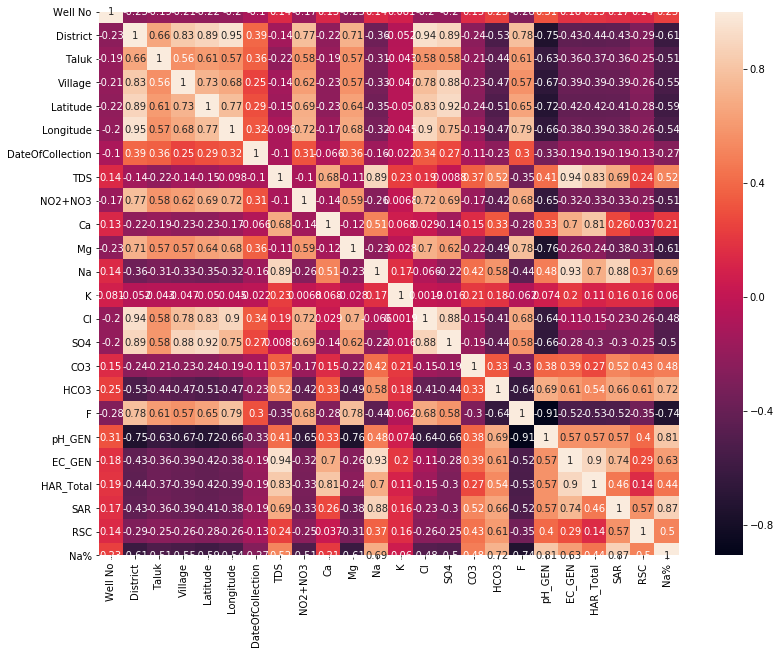

In [33]:
plt.figure(figsize = (13,10))
sns.heatmap(data_new.corr(), annot = True)

In [ ]:
num = ['Well No', 'District', 'Taluk', 'Village', 'Latitude', 'Longitude',
       'DateOfCollection', 'TDS', 'NO2+NO3', 'Ca', 'Mg', 'Na', 'K', 'Cl',
       'SO4', 'CO3', 'HCO3', 'F','pH_GEN', 'EC_GEN', 'HAR_Total', 'SAR',
       'RSC','Na%']

plt.figure(figsize = (20,20))
sns.pairplot(data_new[num])
plt.show()

# Outlier Analysis

In [ ]:
plt.figure(figsize=(20,20))
features = ['Well No', 'District', 'Taluk', 'Village', 'Latitude', 'Longitude',
       'DateOfCollection', 'TDS', 'NO2+NO3', 'Ca', 'Mg', 'Na', 'K', 'Cl',
       'SO4', 'CO3', 'HCO3', 'F','pH_GEN', 'EC_GEN', 'HAR_Total', 'SAR',
       'RSC','Na%']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=data_new)
    plt.xticks(rotation = 20)

# Capping method

In [ ]:
Q1 = data_new['EC_GEN'].quantile(0.01)
Q4 = data_new['EC_GEN'].quantile(0.99)
data_new['EC_GEN'][data_new['EC_GEN'] <= Q1]=Q1
data_new['EC_GEN'][data_new['EC_GEN'] >= Q4]=Q4
sns.boxplot(x='EC_GEN', data=data_new)
plt.show()

In [ ]:
Q1 = data_new['HAR_Total'].quantile(0.01)
Q4 = data_new['HAR_Total'].quantile(0.99)
data_new['HAR_Total'][data_new['HAR_Total'] <= Q1]=Q1
data_new['HAR_Total'][data_new['HAR_Total'] >= Q4]=Q4
sns.boxplot(x='HAR_Total', data=data_new)
plt.show()

In [ ]:
Q1 = data_new['SAR'].quantile(0.01)
Q4 = data_new['SAR'].quantile(0.99)
data_new['SAR'][data_new['SAR'] <= Q1]=Q1
data_new['SAR'][data_new['SAR'] >= Q4]=Q4
sns.boxplot(x='SAR', data=data_new)
plt.show()

In [ ]:
Q1 = data_new['RSC'].quantile(0.01)
Q4 = data_new['RSC'].quantile(0.99)
data_new['RSC'][data_new['RSC'] <= Q1]=Q1
data_new['RSC'][data_new['RSC'] >= Q4]=Q4
sns.boxplot(x='RSC', data=data_new)
plt.show()

In [ ]:
# standardizing data
columns_to_normalize = ['Well No', 'District', 'Taluk', 'Village', 'Latitude', 'Longitude',
       'DateOfCollection', 'TDS', 'NO2+NO3', 'Ca', 'Mg', 'Na', 'K', 'Cl',
       'SO4', 'CO3', 'HCO3', 'F', 'pH_GEN', 'EC_GEN', 'HAR_Total', 'SAR', 'RSC', 'Na%']
data_new[columns_to_normalize] = data_new[columns_to_normalize].apply(lambda x: (x - x.mean()) / np.std(x))

In [ ]:
data_new.head()

In [ ]:
data_new.shape

In [ ]:
# standardizing data
columns_to_normalize = ['Well No', 'District', 'Taluk', 'Village', 'Latitude', 'Longitude',
       'DateOfCollection', 'TDS', 'NO2+NO3', 'Ca', 'Mg', 'Na', 'K', 'Cl',
       'SO4', 'CO3', 'HCO3', 'F', 'pH_GEN', 'EC_GEN', 'HAR_Total', 'SAR', 'RSC', 'Na%']
data_new[columns_to_normalize] = data_new[columns_to_normalize].apply(lambda x: (x - x.mean()) / np.std(x))

In [ ]:
data_new.head()

In [ ]:
# Scaling/standardizing the data
df = data_new[[ 'Well No', 'District', 'Taluk', 'Village', 'Latitude', 'Longitude',
       'DateOfCollection', 'TDS', 'NO2+NO3', 'Ca', 'Mg', 'Na', 'K', 'Cl',
       'SO4', 'CO3', 'HCO3', 'F','pH_GEN', 'EC_GEN', 'HAR_Total', 'SAR', 'RSC', 'Na%']]

# instantiate'District'
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df)
df_scaled.shape

In [ ]:
df.head()

# K-mean Clustering

In [ ]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=5, max_iter=100)
kmeans.fit(df_scaled)

In [ ]:
kmeans.labels_

# Finding the Optimal Number of Clusters

In [ ]:
#First we'll do the silhouette score analysis
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df_scaled)
    ss.append([k, silhouette_score(df_scaled, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

# Elbow Curve plot and choose the optimal number of cluster

In [ ]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df_scaled)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

# KMeans with the K the we have choosed

In [ ]:
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(df_scaled)

In [ ]:
## Let's make a copy of our original data before using it for analysis
orginal_data = data_new.copy()

In [ ]:
data_new.head()

In [ ]:
col = data_new.columns
col

In [ ]:
# Let's add the cluster Ids to the original data 
df_km = pd.concat([data_new.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns = ['Well No', 'District', 'Taluk', 'Village', 'Latitude', 'Longitude',
       'DateOfCollection', 'TDS', 'NO2+NO3', 'Ca', 'Mg', 'Na', 'K', 'Cl',
       'SO4', 'CO3', 'HCO3', 'F', 'pH_GEN', 'EC_GEN', 'HAR_Total', 'SAR', 'RSC', 'Na%','cluster_id']
df_km.head()

In [ ]:
df_km.isnull().sum()

In [ ]:
df_km['cluster_id'].value_counts()

In [ ]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'pH_GEN', y = 'HAR_Total', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')


In [ ]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'EC_GEN', y = 'HAR_Total', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')


In [ ]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'SAR', y = 'HAR_Total', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')


# Cluster Profiling

In [ ]:
df_km.head()

In [ ]:
df_km.groupby('cluster_id').mean()

In [ ]:
df_km[df_km['cluster_id']==0].head()

In [ ]:
df_km.head()

In [ ]:
# single linkage
mergings = linkage(df_km, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# complete linkage
mergings = linkage(df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()